In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("Used_Bikes.csv")
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum()
## to delete the null values

df.dropna(inplace=True)
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [6]:
## duplicates
df.duplicated().sum()

df.drop_duplicates(inplace=True)

In [7]:
##cat col   --- num col
cat_col = df.select_dtypes(include='object')
cat_col.head()


,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [8]:
#feature selection
cat_col = df.drop(["bike_name", "city"],axis=1)
cat_col.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,11000.0,First Owner,4.0,350.0,Royal Enfield
2,600000.0,110.0,First Owner,8.0,675.0,Triumph
3,65000.0,16329.0,First Owner,4.0,180.0,TVS
4,80000.0,10000.0,First Owner,3.0,150.0,Yamaha


In [9]:
num_col= df.select_dtypes(exclude = 'object')
num_col.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [10]:
# cat --> num
## label encoding 
## one hot encoding


In [11]:
## one hot encoding

pd.get_dummies(cat_col).head()

,price,kms_driven,age,power,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,35000.0,17654.0,3.0,110.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,119900.0,11000.0,4.0,350.0,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,600000.0,110.0,8.0,675.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,65000.0,16329.0,4.0,180.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,80000.0,10000.0,3.0,150.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [12]:
## one hot encoding

pd.get_dummies(cat_col).astype(int).head()

,price,kms_driven,age,power,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,35000,17654,3,110,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,119900,11000,4,350,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,600000,110,8,675,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65000,16329,4,180,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,80000,10000,3,150,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
## label encoding  --> ordinal encoding
cat_col['owner'].value_counts

<bound method IndexOpsMixin.value_counts of 0       First Owner
1       First Owner
2       First Owner
3       First Owner
4       First Owner
           ...     
9362    First Owner
9369    First Owner
9370    First Owner
9371    First Owner
9372    First Owner
Name: owner, Length: 7324, dtype: object>

In [14]:
dt = {"First Owner":1,
      "Second Owner":2,
      "Third Owner":3,
      "Fourth Owner Or More":4}

In [15]:
cat_col["owner"] = cat_col["owner"].map(dt)

In [16]:
cat_col.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3.0,110.0,TVS
1,119900.0,11000.0,1,4.0,350.0,Royal Enfield
2,600000.0,110.0,1,8.0,675.0,Triumph
3,65000.0,16329.0,1,4.0,180.0,TVS
4,80000.0,10000.0,1,3.0,150.0,Yamaha


In [17]:
final_df={i: key for key , i in enumerate(list(cat_col['brand'].unique()))}

In [18]:
cat_col['brand'] = cat_col['brand'].map(final_df)

In [19]:
cat_col.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3.0,110.0,0
1,119900.0,11000.0,1,4.0,350.0,1
2,600000.0,110.0,1,8.0,675.0,2
3,65000.0,16329.0,1,4.0,180.0,0
4,80000.0,10000.0,1,3.0,150.0,3


In [20]:
final_df = pd.concat([cat_col, num_col],axis=1)
cat_col.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3.0,110.0,0
1,119900.0,11000.0,1,4.0,350.0,1
2,600000.0,110.0,1,8.0,675.0,2
3,65000.0,16329.0,1,4.0,180.0,0
4,80000.0,10000.0,1,3.0,150.0,3


In [21]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
matrix = final_df.corr()
matrix

,price,kms_driven,owner,age,power,brand,price,kms_driven,age,power
price,1.000000,-0.199951,-0.005188,-0.248752,0.807641,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,-0.199951,1.000000,0.062612,0.367518,-0.168295,-0.036161,-0.199951,1.000000,0.367518,-0.168295
owner,-0.005188,0.062612,1.000000,0.203151,0.043746,0.005844,-0.005188,0.062612,0.203151,0.043746
age,-0.248752,0.367518,0.203151,1.000000,-0.164211,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.807641,-0.168295,0.043746,-0.164211,1.000000,0.068647,0.807641,-0.168295,-0.164211,1.000000
brand,0.288409,-0.036161,0.005844,-0.030263,0.068647,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,1.000000,-0.199951,-0.005188,-0.248752,0.807641,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,-0.199951,1.000000,0.062612,0.367518,-0.168295,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,-0.248752,0.367518,0.203151,1.000000,-0.164211,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.807641,-0.168295,0.043746,-0.164211,1.000000,0.068647,0.807641,-0.168295,-0.164211,1.000000


<Axes: >

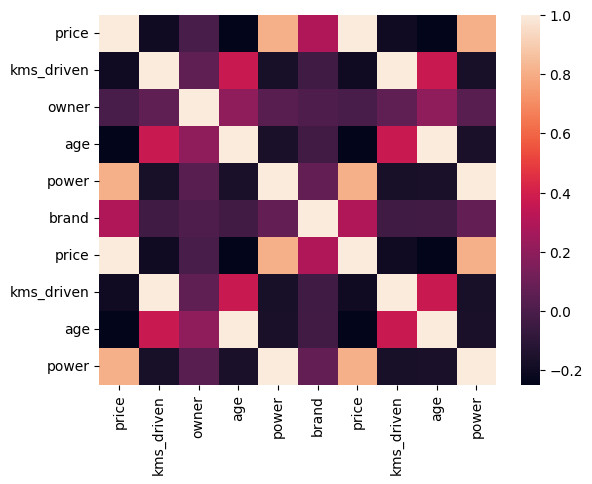

In [23]:
sns.heatmap(matrix)

<Axes: >

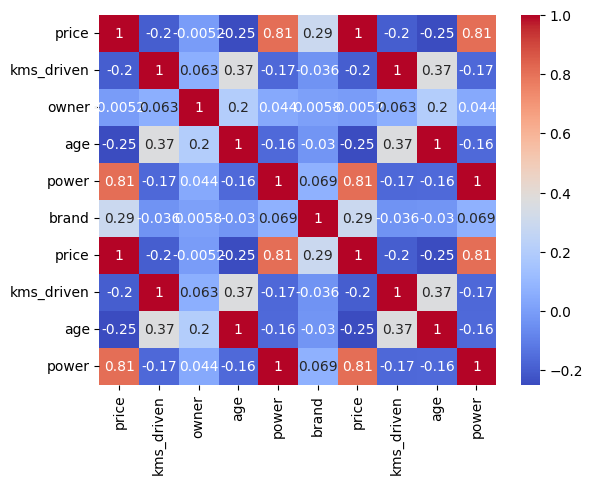

In [24]:
sns.heatmap(matrix, annot=True, cmap='coolwarm')

In [25]:
## divide the data into independent and dependent features
x = final_df.drop('price',axis=1)
y = final_df['price']

In [26]:
## training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, 
                                                    test_size=0.2, 
                                                    random_state= 42)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
lr.score(x_train, y_train)


0.705382660567176

In [29]:
lr.score(x_test, y_test)

0.758690086938602

In [30]:
## model evaluation
y_pred = lr.predict(x_test)
y_pred

array([[125382.54523531, 125382.54523531],
       [216422.20333613, 216422.20333613],
       [ 96966.48595239,  96966.48595239],
       ...,
       [ 72233.83615101,  72233.83615101],
       [208856.67620683, 208856.67620683],
       [  9305.60087565,   9305.60087565]], shape=(1465, 2))

In [31]:
## making a dataframe
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
## model evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MAE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 34658.309865610565
MAE: 4697994405.450414
RMSE: 68541.91714163248


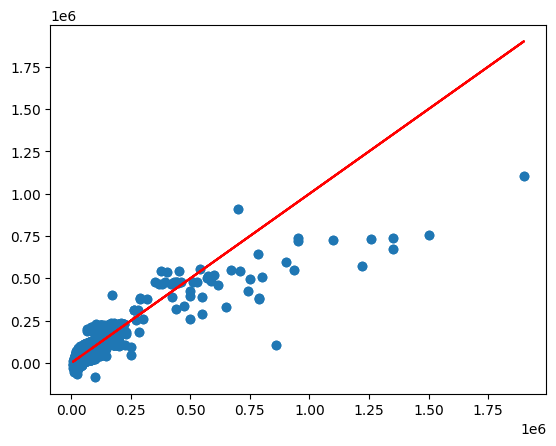

In [ ]:
## drawing the regression line and line also
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, color= 'red')

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

plt.bar(['MAE', 'MSE', 'RMSE'], [mae, mse, rmse], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Evaluation'); plt.ylabel('Error'); plt.show()


In [ ]:
df = pd.read_csv("cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   object 
 1   price       7324 non-null   float64
 2   city        7324 non-null   object 
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   object 
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   object 
dtypes: float64(4), object(4)
memory usage: 515.0+ KB


In [ ]:
df.isnull().sum()
df.dropna(inplace = True)

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [ ]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [ ]:
loyal_customer = df[df["Customer Type"] == "Loyal Customer"]
disloyal_customer = df[df["Customer Type"] == "disloyal Customer"]

In [ ]:
loyal_customer = loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [ ]:
balance_df = pd.concat([loyal_customer, disloyal_customer], axis = 0)
balance_df.shape

(38981, 12)

In [ ]:
cat_col = balance_df.select_dtypes(include=["object"])
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
19764,Male,Loyal Customer,Personal Travel,Business,neutral or dissatisfied
100690,Male,Loyal Customer,Business travel,Business,satisfied
90472,Male,Loyal Customer,Business travel,Business,satisfied
1789,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
55729,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied


In [ ]:
pd.get_dummies(cat_col, drop_first=True).astype(int).head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
19764,1,0,1,0,0,0
100690,1,0,0,0,0,1
90472,1,0,0,0,0,1
1789,1,0,1,1,0,0
55729,0,0,1,1,0,0


In [32]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe = OneHotEncoder(drop= "if_binary")
cat_col_encoded = ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(7324, 5069))

In [38]:
column_name = list(ohe.get_feature_names_out())
column_name

['price_4400.0',
 'price_5000.0',
 'price_5800.0',
 'price_6400.0',
 'price_6700.0',
 'price_6890.0',
 'price_7000.0',
 'price_7500.0',
 'price_8000.0',
 'price_8100.0',
 'price_9000.0',
 'price_9350.0',
 'price_9400.0',
 'price_9500.0',
 'price_10000.0',
 'price_10005.0',
 'price_10200.0',
 'price_10414.0',
 'price_10500.0',
 'price_10600.0',
 'price_10669.0',
 'price_10800.0',
 'price_10951.0',
 'price_11000.0',
 'price_11100.0',
 'price_11400.0',
 'price_11500.0',
 'price_11900.0',
 'price_12000.0',
 'price_12200.0',
 'price_12500.0',
 'price_12800.0',
 'price_12982.0',
 'price_12999.0',
 'price_13000.0',
 'price_13100.0',
 'price_13200.0',
 'price_13500.0',
 'price_13600.0',
 'price_13700.0',
 'price_13900.0',
 'price_14000.0',
 'price_14200.0',
 'price_14227.0',
 'price_14500.0',
 'price_14700.0',
 'price_14800.0',
 'price_14900.0',
 'price_15000.0',
 'price_15200.0',
 'price_15244.0',
 'price_15300.0',
 'price_15344.0',
 'price_15500.0',
 'price_15600.0',
 'price_15800.0',
 'pric

In [37]:
one_hot = pd.DataFrame(cat_col_encoded, columns = column_name)
one_hot.head()

,price_4400.0,price_5000.0,price_5800.0,price_6400.0,price_6700.0,price_6890.0,price_7000.0,price_7500.0,price_8000.0,price_8100.0,...,brand_13,brand_14,brand_15,brand_16,brand_17,brand_18,brand_19,brand_20,brand_21,brand_22
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
one_hot = one_hot.reset_index(drop = True)
num_col = num_col.reset_index(drop = True)
final_df = pd.concat([one_hot, num_col])
final_df.head()

,price_4400.0,price_5000.0,price_5800.0,price_6400.0,price_6700.0,price_6890.0,price_7000.0,price_7500.0,price_8000.0,price_8100.0,...,brand_17,brand_18,brand_19,brand_20,brand_21,brand_22,price,kms_driven,age,power
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
## x and y --->train test split --> algo train